# Milestone P2

[Milestone P2 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p2-project-proposal-and-initial-analyses)
# Milestone Objectives

The aims of this milestone are to enhance our familiarity with the dataset to achieve our ultimate goal of identifying pivotal movies. To accomplish this, we will follow a structured approach:

- **Data Exploration** : Interact with the dataset to gain insights and explore potential avenues for analyzing movies and identifying trends.

- **Data Cleaning** : Clean the dataset to retain only movies that possess the relevant features necessary for our analysis. This step ensures that we work with a refined and focused dataset.

- **Dataset Augmentation** : Enhance the dataset by incorporating additional features, as outlined in the ReadMe. Notably, we will include movie ratings, which are important for characterizing the popularity of movies.

- **Preliminary Analysis** : Conduct a concise and initial analysis to identify pivotal movies. This analysis will provide valuable insights into the significance of certain movies within the dataset.






## Configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from implementations import *

In [3]:
# Data Path
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"

# Load Data
df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                  'box_office','runtime','lang','countries','genres'])

# 1) What's in the data?

First, let's take a global view of what we have in the CMU movie dataset. We'll explore the dataset's overall structure, key variables, and initial characteristics to better understand the scope and content of the data before delving into specific analyses and preprocessing steps.

### a) Let's analyse how many movie the dataset contain

In [4]:
print("We have a total number of {} movies in the dataset ".format(len(df)))


We have a total number of 81741 movies in the dataset 


### b) But what features do we have ?


In [5]:
print(df.columns)

Index(['id_wiki', 'id_freebase', 'name', 'date', 'box_office', 'runtime',
       'lang', 'countries', 'genres'],
      dtype='object')


- **id_wiki:** This is a unique identifier associated with each movie on Wikipedia.

- **id_freebase:** This is a unique identifier associated with each movie on Freebase. This features provide no usefull information as database from Freebase were merged with Wikipedia in 2014. 

- **name:** Title of the movie.

- **date:** Date of release of the movie. 

- **box_office:** Contains the box office revenue in dollars.

- **runtime:** Duration if the film in minutes.

- **lang:**  This column indicates the language in which the movie is primarily presented.

- **countries:** This column is associated with country of the production of the movie.

- **genres:** Genres associated with the film.

Let's see an example with our favorite movie saga: *Twilight*. 

But where are our precious movie ? As the dataframe contains 80,000 movies we need to find which one contain the word Twilight in the title name

In [6]:

result = df[df['name'].str.contains('twilight', case=False, na=False)]
display(' Movie title that contains Twilight \n', result['name'] )

' Movie title that contains Twilight \n'

2673                                     Women of Twilight
3241                              Twilight's Last Gleaming
7447                           Twilight of the Dark Master
9863                                      Twilight Dancers
9912             The Twilight Saga: Breaking Dawn - Part 1
13863    Memories of Berlin: The Twilight of Weimar Cul...
14223                                             Twilight
18376                                       Tokyo Twilight
19856                             Twilight Zone: The Movie
27507                              The Kingdom of Twilight
33617                          Twilight of the Cockroaches
33659                                             Twilight
35389                                     Twilight Theater
41159                                    Twilight of Honor
41604                                 The Twilight Samurai
42224                              Sir Galahad of Twilight
42881                                 Twilight of the Go

In [7]:
print( 'We have a total of {} movie that contain Twilight in their title'.format(len(result)))

We have a total of 29 movie that contain Twilight in their title


That's more than we expected ! Anyway, I see my favorite one *The Twilight Saga: Breaking Dawn - Part 1*. Let's analyse the feature of this movie.



In [8]:
FILM_NAME='The Twilight Saga: Breaking Dawn - Part 1'

print('Released date: {} \n' .format(df[
    df['name']==FILM_NAME]['date'].values[0]))

print('Genres: {} \n'.format(df[
    df['name']==FILM_NAME]['genres'].values[0]))

print('Countries of production: {} \n'.format(df[
    df['name']==FILM_NAME]['countries'].values[0]))


print('Box office revenues : {:,.0f}$ \n'.format(df[
    df['name']==FILM_NAME]['box_office'].values[0]))

print('Duration : {:.0f} minutes \n'.format(df[
    df['name']==FILM_NAME]['runtime'].values[0]))

print('Language adaptation :{}' .format(df[
    df['name']==FILM_NAME]['lang'].values[0]))

Released date: 2011-11-16 

Genres: {"/m/07s9rl0": "Drama", "/m/01hmnh": "Fantasy", "/m/03k9fj": "Adventure", "/m/02b5_l": "Teen", "/m/03rzvv": "Romantic fantasy"} 

Countries of production: {"/m/09c7w0": "United States of America"} 

Box office revenues : 705,058,657$ 

Duration : 117 minutes 

Language adaptation :{"/m/02h40lc": "English Language"}


As we can see some features are not that clean like **genre, countries and language adaptation**.These features will need to be treated in the second part 

### c) Overall Overview


After examining the feature for the film *The Twilight Saga: Breaking Dawn - Part 1* let's delve into a broader understanding of the dataset.  Now, shifting our focus to the entire dataset, we aim to provide a comprehensive overview. 

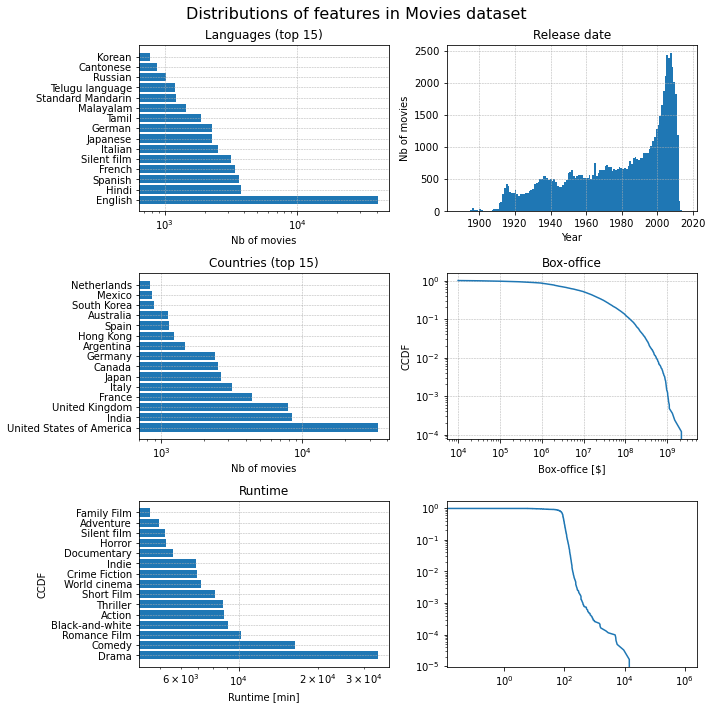

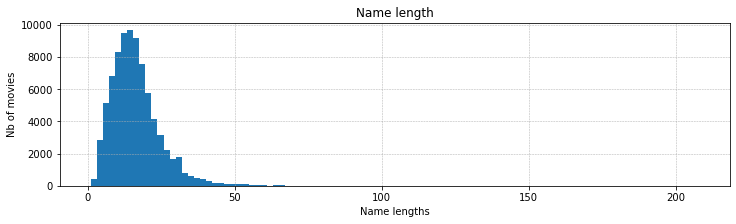

In [9]:

data_viz(df, israw=True)

# 2) Cleaning the data


This part focus on cleaning the data. Indeed, cleaning data is an important step for accurate data analysis. It ensures the integrity of results, reduces the risk of errors, and promotes consistency in reporting. Clean data enhances data understanding, uncovering valuable insights and patterns. Moreover, it facilitates compatibility with other datasets, mitigates bias, and ensures compliance with industry regulations. In essence, data cleaning is an essential step that contributes to the overall quality and effectiveness of data-driven processes. But first thing first let's make a deep copy of the dataset before filtering

In [10]:
movies = df.copy()

### a) Removing missing data :

In order to identify pivotal movie, some future of data are crucial. First is data linked to trend identification. To identify trends for movie we need two features : the **date of release** and the **genres** of the movie. Then we remove all movie that have either missing date feature or missing genres feature.



In [11]:
# Handle missing values
movies = data_missing(movies)

### b) Filtering data

Now that the missing data has been dropped, we will address unclear features in the dataset. Building on the example of 'Twilight' from part 1, we observed that the presentation of languages, countries, and genres needed improvement. Let's reorganize and standardize these features for better clarity. Additionally, we'll modify the date format to establish a consistent basis for every film in the dataset. 


In [12]:
# Format data types
movies = data_format(movies)

Let's take a look to the refresh features

In [13]:

print('Released date: {} \n' .format( movies[
    movies['name']==FILM_NAME]['date'].values[0]))

print('Genres: {} \n'.format( movies[
    movies['name']==FILM_NAME]['genres'].values[0]))

print('Countries of production: {} \n'.format(    movies[
       movies['name']==FILM_NAME]['countries'].values[0]))
  

print('Language adaptation :{}' .format(movies[
        movies['name']==FILM_NAME]['lang'].values[0]))

Released date: 2011 

Genres: ['Drama', 'Fantasy', 'Adventure', 'Teen', 'Romantic fantasy'] 

Countries of production: ['USA'] 

Language adaptation :['English Language']


Nice! Now we see clearly genre, countries of production and language adaptation. Furthermore we only keep the year the film have been released to our further analysis.

For the sake of simplicity we rename the colon date by year and column box_office by revenue

In [14]:
movies.rename(columns={'box_office': 'revenue'}, inplace=True)
movies.rename(columns={'date': 'year'}, inplace=True)


### c) Boundary definition

To ensure the accuracy of our data for analysis, it is crucial to define boundaries within the 'date' feature. Occasionally, incorrect data may be present, leading to inconsistencies. Let's identify and rectify such errors to maintain data integrity and ensure meaningful analysis.

In [15]:
display(movies[movies['year']<1800][['name','year']])

,name,year
62836,Hunting Season,1010


Turns out the Middle Ages had more drama than we thought , the first medieval blockbusters is here! But all joke aside let's clean it

In [16]:
# Clean data, outliers and features
movies = data_clean(movies)


### d) Filtering data


The last step is to filter our data. Indeed, we want to focus our analysis only on movies produced in the USA and in English.

In [17]:

# Filter data
movies = data_filter(movies)

# 3) Enrich Data


In [140]:
# MEHDI: merge datasets and analysis

# 4) Pipeline (naive approach)

In this section, we will provide an example of how we could identify pivotal movies using a relatively simple approach. This part aims to offer insights into the process of recognizing pivotal movies within a dataset
1. Plot subsets (genres, etc.)
2. Range prior to a trend peak
3. Algo for pivotal movie (box-office, reviews, summary similarites)

In [158]:
from implementations import ax_settings, create_subset

### a) Analysing a trend: first approach

To effectively identify the 'hype generator', it's essential to define 'hype' precisely. We have opted to measure hype as the annual percentage change in the production of various movie genres. This approach accounts for the evolving ease of movie production and the resultant increase in the overall number of films produced each year. By focusing on yearly percentage changes, we can effectively neutralize the impact of the growing volume of movie production, ensuring our analysis remains robust and accurate.

Size subset (Teen) 29830


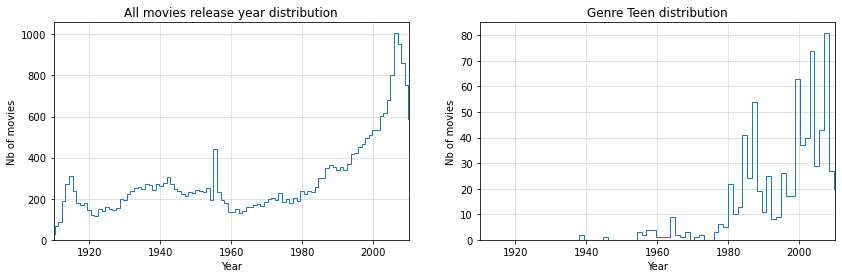

In [24]:
# Create a subset to compare to the whole dataset (here: Teen Movies)
key = 'Teen'
subset = create_subset(movies, key)
print("Size subset ({}) {}".format(key, len(movies)))

# Plot release dates distribution
fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs = axs.ravel()

movies.year.hist(bins=movies.year.nunique(), ax=axs[0], histtype='step')
ax_settings(axs[0], xlabel='Year', ylabel='Nb of movies', title='All movies release year distribution')
axs[0].set_xlim((1910,2010))

subset.year.hist(bins=subset.year.nunique(), ax=axs[1], histtype='step')
ax_settings(axs[1], xlabel='Year', ylabel='Nb of movies', title='Genre {} distribution'.format(key))
axs[1].set_xlim((1910,2010))

plt.show()

This is an early version of the analysis. Here we simply plot the number of movies distribution, but we plan to use the fraction of (subset) movies distribution later for more robust results. However, this already gives us an idea of what we could expect from the data.

We display two graphs above. The left plot is the distribution of movie releases over time. The right plot shows the evolution of number of movies releases over time, of the genre "Teen movie". We immediately notice several elements. First the shapes of the two curves are markedly different, this confirms us that we choose an interesting subset for analysis, since it differs from the baseline. Now by looking more closely, we see that the genre Teen emerged at a certain point in cinema, because (almost) no data exists before late 70's, and we have no record before late 50's. This is very indicating about the existence of a trend ! But we can extract more, we significantly see two bumps in the Teen plot centered around two different decades. Without going much further here, we can already assume that pivotal movies are hiding here...

### b) Evolution of genre in between 1990 and 2012

# Hype Generator


After this initial example, let's delve deeper into the evolution of the 60 genres across 23 years of cinema. In this analysis, we shift our focus from the raw number of films released to the percentage relative to the total number of films released each year. This perspective provides a more nuanced understanding of the genre distribution over the years.



To effectively identify the 'hype generator', it's essential to define 'hype' precisely. We have opted to measure hype as the annual percentage change in the production of various movie genres. This approach accounts for the evolving ease of movie production and the resultant increase in the overall number of films produced each year. By focusing on yearly percentage changes, we can effectively neutralize the impact of the growing volume of movie production, ensuring our analysis remains robust and accurate.

We will next focus on identifying the movie that ignited this surge in popularity. By examining films in the pertinent genres and identifying the highest-grossing one in the 4 to 10 years prior (based on the assumption that it takes 4 years to produce a movie), we aim to pinpoint the film that was instrumental in boosting the genre's appeal.

In [159]:
summaries, characters, tvtropes, movies_initial_subset = get_initial_data(MOVIES_FOLDER) #REMOVE 
#BECAUSE USELESS

First we have the plot for the 20 most common genre

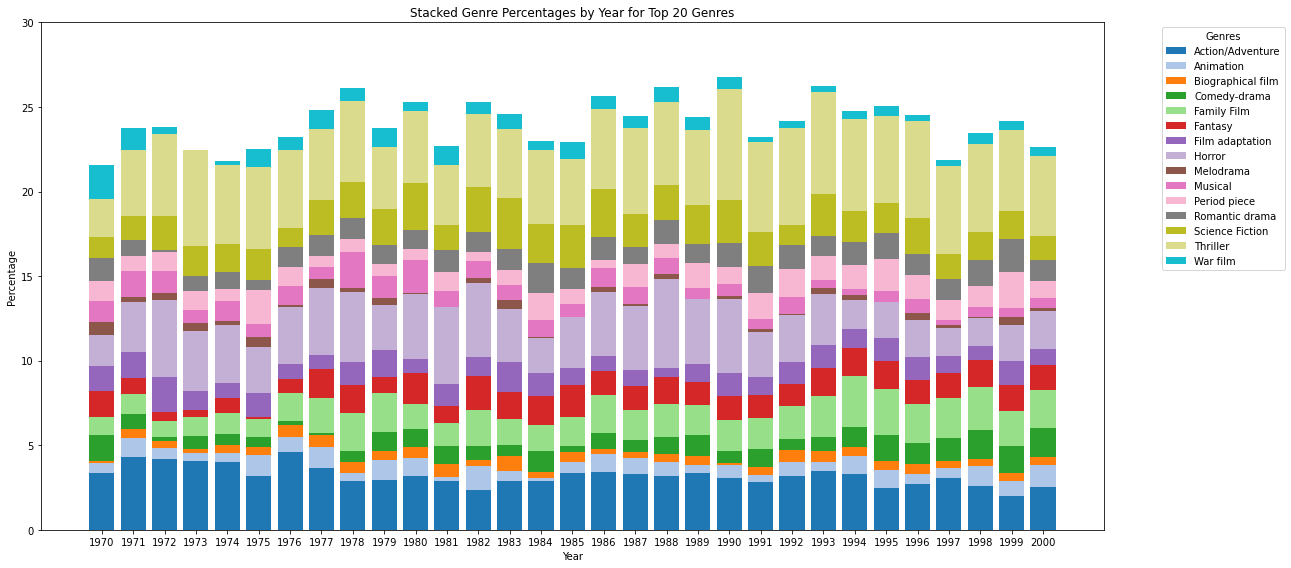

In [42]:
plot_genres_percentages_per_year(movies, 1970, 2000, 15,30,30) # PUT THIS GRAPH 
#IN PART 1.C


## Art film hype generator 
In the graphic above we see an increase in popularity in movie with the genre Art Film year 2003 to 20007 so we can predict that there is a pivotal movie in the year 1990-2001 So we print the 5 movies with the highest revenues during this period. We can assume that one of these movies influenced the creation of the movies between 2003 and 2007. 

In [41]:
art_film_movies = movies[movies['genres'].apply(lambda x: "Biography" in x)] # look for genre: Art film

art_films_1990_2000 = art_film_movies[(art_film_movies['year'] >= 1986) & (art_film_movies['year'] <= 1991)]

highest_revenue_movie = art_films_1990_2000[art_films_1990_2000['revenue'].notna()].sort_values('revenue', ascending=False).head(4)

display(highest_revenue_movie[["name","year","revenue"]])

,name,year,revenue
46544,Serpico,1973,29800000.0
19390,Walking Tall,1973,23000000.0
13824,Julia,1977,20714400.0
67826,MacArthur,1977,16320000.0


In [45]:
art_film_movies = movies[movies['genres'].apply(lambda x: "Comedy-drama" in x)] # look for genre: Art film

art_films_1990_2000 = art_film_movies[(art_film_movies['year'] >= 1973) & (art_film_movies['year'] <= 1978)]

highest_revenue_movie = art_films_1990_2000[art_films_1990_2000['revenue'].notna()].sort_values('revenue', ascending=False).head(4)

display(highest_revenue_movie[["name","year","revenue"]])

,name,year,revenue
6601,American Graffiti,1973,140000000.0
47117,One Flew Over the Cuckoo's Nest,1975,108981275.0
15901,Shampoo,1975,60000000.0
68225,Semi-Tough,1977,37187139.0


There is also an increase in popularity in the year 1991 so we can look for an hype generator in the year 1980-1999

In [30]:
art_film_movies = movies[movies['genres'].apply(lambda x: "Art film" in x)] # look for genre: Art film

art_films_1990_2000 = art_film_movies[(art_film_movies['year'] >= 1980) & (art_film_movies['year'] <= 1989)]

highest_revenue_movie = art_films_1990_2000[art_films_1990_2000['revenue'].notna()].sort_values('revenue', ascending=False).head(5)

display(highest_revenue_movie[["name","year","revenue"]])

,name,year,revenue


### Predictions

## Hype Generator by top xth to yth genre popularity rank: 
Now we want to automate the process recently done with the art movie in order to predict the hype generators:


We will now identify the genre that experienced the highest percentage change in popularity between 1990 and 2013. A significant change in this percentage is indicative of a 'hype' in the genre, revealing shifts in audience and producers preferences and trends during this period.

We no focus on identifying the movies that ignited surge in popularity. By examining films in the pertinent genres and identifying the highest-grossing one in the 4 to 10 years prior (based on the assumption that it takes 4 years to produce a movie), we aim to pinpoint the film that was instrumental in boosting the genre's appeaThe  will the range of popularity can have an impactl The range chosen have an impact becausese the top genres are often too broad and mainstream, while the genres at the bottom tend to be too specialized and niche. By selecting this middle range, we aim to strike a balance, capturing genres that are neither too generic nor excessively, but you are free to change the function parameter niche.

In [149]:
hype_generators(movies_initial_subset.dropna(),1990,2013,0,60)


Highest change in percentage by genre between 1990 and  2013 (hype))
 index   year                 genres  count  percentage  percentage_change
  6394 2009.0              Absurdism      3    0.167504           1.971524
  6791 2012.0                 Action     38   10.382514           0.722848
  5890 2006.0       Action Thrillers     13    0.692226           4.122471
  4932 2000.0       Action/Adventure     34    2.888700           0.684568
  4110 1994.0              Adventure     28    2.950474           0.497800
  3858 1992.0              Animation      8    0.958084           2.468263
  3863 1992.0      Biographical film      6    0.718563           1.601198
  5585 2004.0              Biography     17    1.111111           0.516667
  4396 1996.0           Black comedy     14    1.351351           1.142857
  6797 2012.0             Buddy film      2    0.546448           4.803279
  5264 2002.0             Children's      6    0.398671           0.786047
  4672 1998.0     Children's Fa

### Main Subset

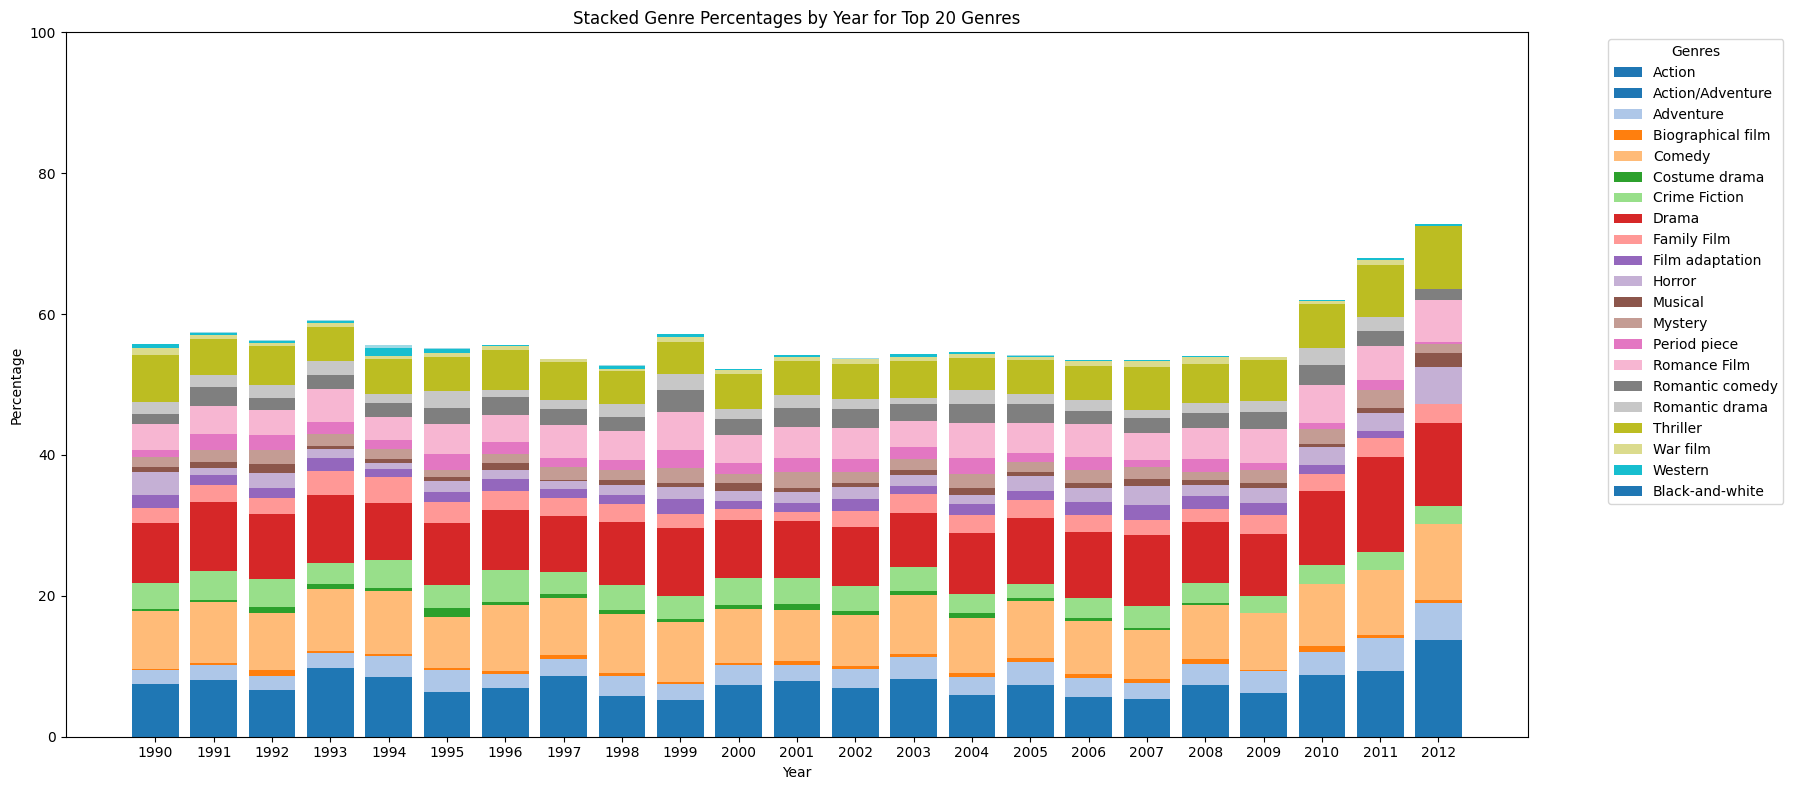

In [150]:
movies_adapted= movies.copy()
movies_adapted["revenue"] = movies_adapted["box_office"]
date_conversion(movies_adapted)
movies_adapted.dropna()
plot_genres_percentages_per_year(movies_adapted, 1990, 2013, 0,21,100)


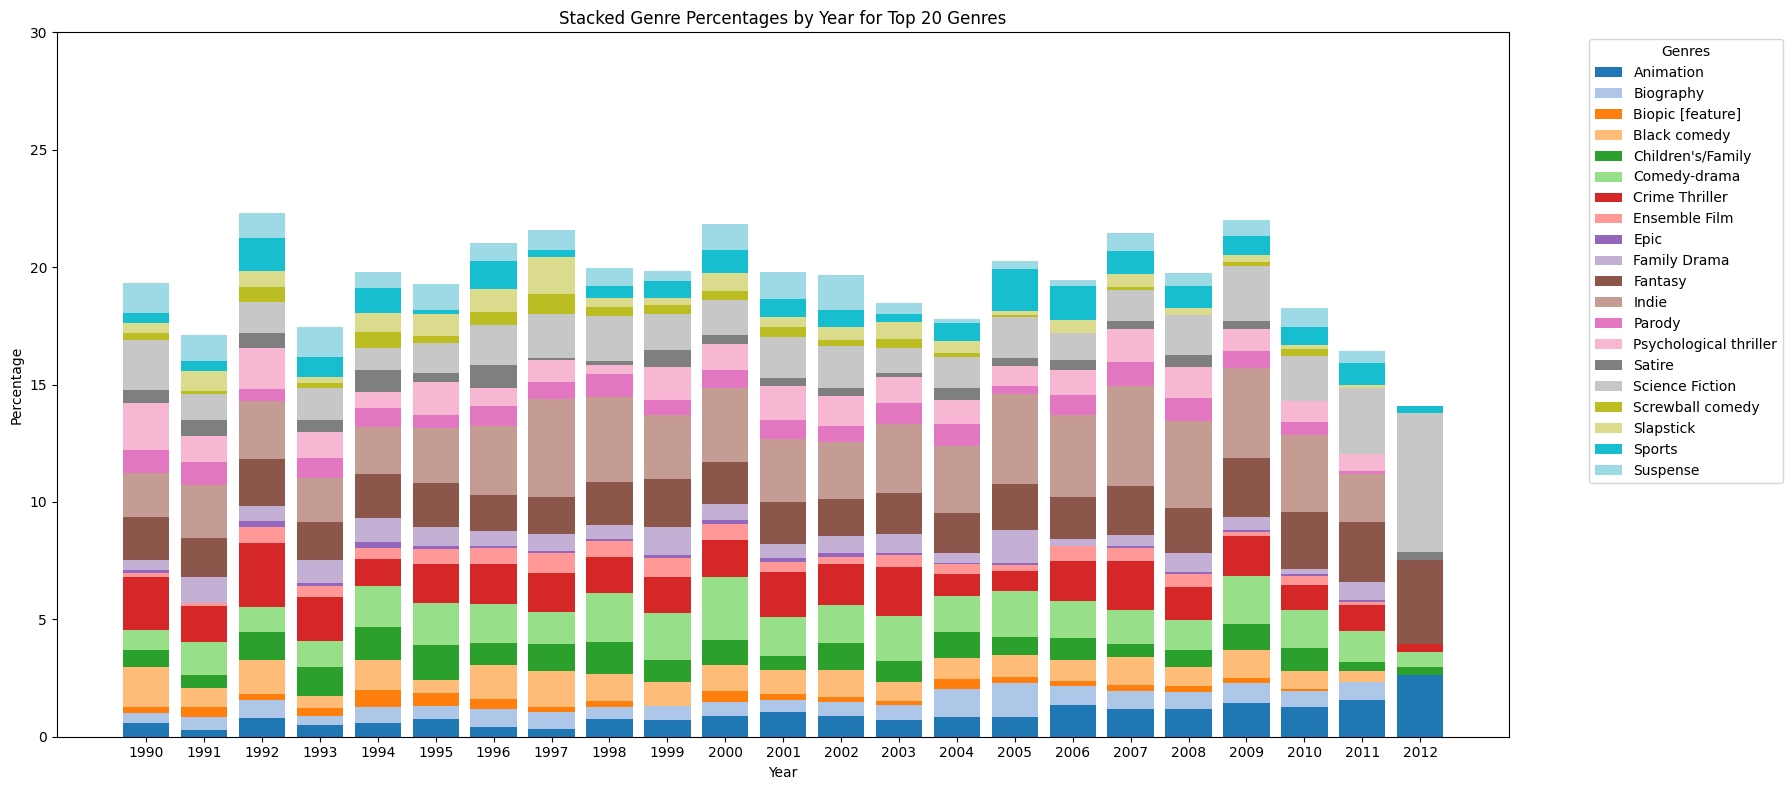

In [154]:
plot_genres_percentages_per_year(movies_adapted, 1990, 2013, 21,41,30)


In [152]:
hype_generators(movies_adapted,1990,2013,0,60)

Highest change in percentage by genre between 1990 and  2013 (hype))
 index  year                 genres  count  percentage  percentage_change
  6106  2009              Absurdism      3    0.235849           2.191038
  6469  2012                 Action     33   10.819672           0.892292
  5627  2006       Action Thrillers     11    0.784593           3.625178
  4720  2000       Action/Adventure     34    3.343166           0.731408
  6377  2011              Adventure     38    4.622871           0.408616
  3678  1992              Animation      6    0.787402           1.830709
  6258  2010      Biographical film      8    0.772201           2.274131
  3929  1994              Biography      6    0.699301           0.885781
  3931  1994           Black comedy     11    1.282051           1.592949
  6474  2012             Buddy film      2    0.655738           4.390164
  6387  2011             Children's      2    0.243309           1.520681
  4468  1998     Children's Fantasy      7 

# Trope Originators

Enclosed is a curated selection of seminal films, each marking the inaugural appearance of a particular trope. These films are esteemed as pivotal within the cinematic world, as they present audiences with the archetype of a character type for the very first time, setting the stage for countless others to folw.
lo(It! it is from the uncomplete dataset, from the course given data). w.

In [153]:
trope_originators(tvtropes, movies_initial_subset)

,category,name,date
2,absent_minded_professor,The Shadow,1940-01-05
13,adventurer_archaeologist,The Mummy,1932-12-22
14,arrogant_kungfu_guy,Enter the Dragon,1973-07-26
33,big_man_on_campus,Can't Hardly Wait,1998-06-12
42,bounty_hunter,The Bounty Hunter,1954-01-01
48,brainless_beauty,Fool's Gold,1919-05-26
73,broken_bird,Alice in Wonderland,1915-01-19
85,bromantic_foil,Mallrats,1995-10-20
91,bruiser_with_a_soft_center,Casino Royale,1954-01-01
94,bully,A Christmas Story,1983-11-18
